# Visualing the Latent Space of an Autoencoder:

### Imports:

In [13]:
import os
import numpy as np
import matplotlib.pyplot as plt
from umap import UMAP
from sklearn.decomposition import PCA
from pathlib import Path

### Latent Space Visualizer Class:

In [14]:
class LatentSpaceVisualizer:
    """
    Handles projection and visualization of Autencoder latent embeddings. Designed to operate as a standalone
    explainability component.
    """
    
    def __init__(self, method: str="pca", n_components: int=2) -> None:
        """
        Initializes the latent space visualizer.
        
        Args:
            method: The projection method to use
            n_components: The number of projection dimensions
            
        Returns:
            None:
        """
        self.method = method
        self.n_components = n_components
        self.projection_model = None
        
    
    def fit(self, latent_embeddings: np.ndarray) -> None:
        """
        Fits the projection model on the latent embeddings produced by an Autoencoder.
        
        Args:
            latent_embeddings: Latent embeddings from an autoencoder
            
        Returns:
            None:
        """
        if self.method == "pca":
            self.projection_model = PCA(n_components=self.n_components)
            
        elif self.method == "umap":
            self.projection_model = UMAP(n_components=self.n_components)
            
        else:
            raise ValueError("This dimensionality reduction technique is not recognized.")
        
        self.projection_model.fit(latent_embeddings)
        
    
    def transform(self, latent_embeddings: np.ndarray) -> np.ndarray:
        """
        Projects the latent embeddings into a lower-dimensional space.
        
        Args:
            latent_embeddings: Latent embeddings from an autoencoder
            
        Returns:
            np.ndarray: Dimensionally reduced embeddings
        """
        if self.projection_model is None:
            raise ValueError("Projection model has not been defined or fit yet.")
        
        return self.projection_model.transform(latent_embeddings)
    
    
    def fit_transform(self, latent_embeddings: np.ndarray) -> np.ndarray:
        """
        Fits the projection model and tranforms the latent embeddings to a lower dimension.
        
        Args:
            latent_embeddings: Latent embeddings from an autoencoder
            
        Returns:
            np.ndarray: Dimensionally reduced embeddings
        """
        self.fit(latent_embeddings)
        return self.transform(latent_embeddings)
    
    
    def plot(self, reduced_embeddings: np.ndarray, anomaly_scores: np.ndarray | None=None, save_path: str | None=None, title: str="Autoencoder Latent Space Projection") -> None:
        """
        Creates a 2D scatter plot of projected embeddings.
        
        Args:
            reduced_embeddings: The dimensionally reduced latent embeddings
            save_path: If specified, saves a PNG image of the histogram            
            anomaly_scores: Anomaly scored produced by an Isolation Forest
            title: The title to give the plotted figure
            
        Returns:
            None:
        """
        plt.figure(figsize=(8,6))
        
        # Case wher anomaly scores are provided
        if anomaly_scores is not None:
            scatter = plt.scatter(
                x=reduced_embeddings[:, 0],
                y=reduced_embeddings[:, 1],
                c=anomaly_scores,
                cmap="coolwarm",
                alpha=0.7
            )
            plt.colorbar(scatter, label="Anomaly Score")
        
        # Case where anomaly scores are not provided 
        else:
            plt.scatter(
                x=reduced_embeddings[:, 0],
                y=reduced_embeddings[:, 1],
                alpha=0.7
            )
            
        plt.xlabel("Axis 1")
        plt.ylabel("Axis 2")
        plt.title(title)
        plt.grid(True)
        plt.tight_layout()
        
        # Saves the figure if a save path is specified
        if save_path:
            save_dir = r"explainability\latent_space_projections"
            save_path = os.path.join(save_dir, save_path)
            plt.savefig(save_path)
            
        plt.show()

### Loading Latent Embeddings and Anomaly Scores:

In [15]:
latent_embeddings = np.load(r"encoders\encoder_model_1\latent_embeddings.npy")

In [16]:
anomaly_scores = np.load(r"isolation_forests\iforest_model_1\anomaly_scores.npy")

### Initializing and Fitting the Visualizer:

In [17]:
ls_visualier = LatentSpaceVisualizer()
reduced_embeddings = ls_visualier.fit_transform(latent_embeddings)

### Plotting the Transformed Embeddings:

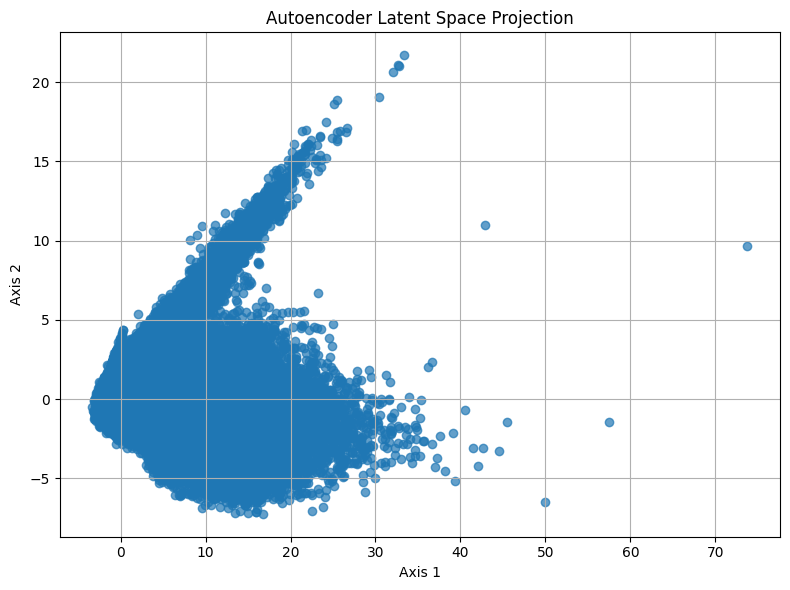

In [18]:
ls_visualier.plot(reduced_embeddings, save_path="projection.png")

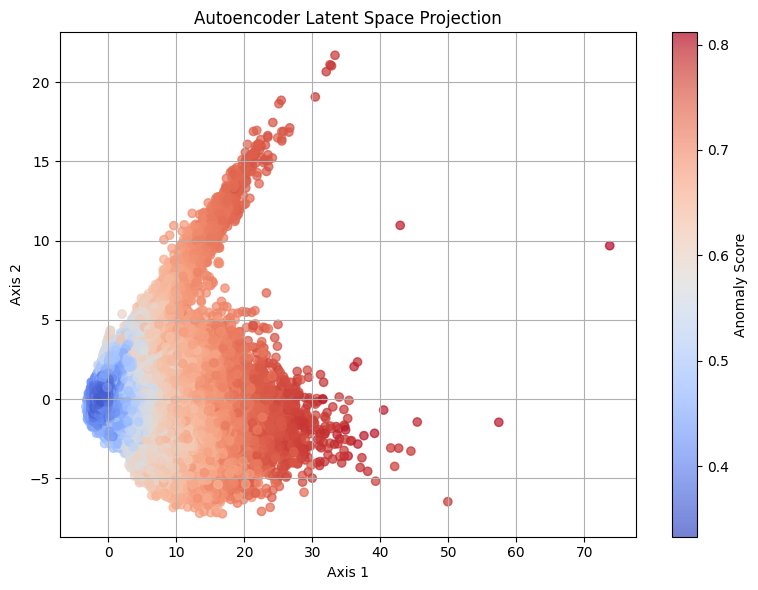

In [19]:
ls_visualier.plot(reduced_embeddings, anomaly_scores, save_path="labeled_projecion.png")